## 1. similarCustomers Function
This notebook contains detailed explanations of the similarCustomers function provided by the api. These explanations represent the logic behind the functions and show small examples.

### 1.1. Goal
Given customer id, parameters which will define the customers' purchasing behaviors and parameters which will define recommendation-specific details, this function will return a list of similar customers and a list of recommended products.

### 1.2. Function Template
#### Input
localhost:8086/similarCustomers?jsonData={"id": 863895, 

"xAxis":1, "yAxis": 2, , "slots": [{"x":0,"y":8},{"x":10,"y":20},{"x":20,"y":24}], "type": 2, 

"searchType": 1, "ProfileId": 123, "ProfileDs": "Bebek", 

"distanceType": 3, "Count":15, "MinPercentage":10, 

"productCount": 10, "baseCount": 50, "recommenderType": "mix"}

#### Output
{"Customers": [{"distances": 0, "percentage": 100, "id": 1279930}, {"distances": 35, "percentage": 72, "id": 1406410}, {"distances": 42, "percentage": 66, "id": 1058305}, {"distances": 42, "percentage": 66, "id": 1366933}, {"distances": 44, "percentage": 65, "id": 91248}],

"MinDistance": 0, "MaxDistance": 128,

"Products": [{"id": 12680, "percentage": 62}, {"id": 12667, "percentage": 48}, {"id": 20083, "percentage": 48}, {"id": 12700, "percentage": 46}, {"id": 12677, "percentage": 46}, {"id": 12719, "percentage": 44}, {"id": 12678, "percentage": 38}, {"id": 10981, "percentage": 36}, {"id": 12689, "percentage": 32}, {"id": 12668, "percentage": 27}] }

### 1.3. Logic
similarCustomers has two main functionalities; finding a list of similar customers and generating a list of recommended items for those customers. We will explain these two functionalities separately.

#### 1.3.1. Finding Similar Customers
In the description of customerSalesMap function, we explained axis, slot and type parameters in a detailed way. These parameters are also used in the same way in similarCustomers function.

In Figure 1.1, we have sales records of 7 different customers (C0, .., C6) based on DowIndex. DowIndex has values from 0 to 6 which corresponds to Monday to Sunday respectively.

|CustomerIndex|DowIndex|Amount|
|--|-------------------------------|
|0 |4 |5|
|0 |5 |5|
|0 |6 |8|
|1 |0 |5|
|1 |2 |1|
|1 |5 |2|
|1 |6 |2|
|2 |1 |1|
|2 |2 |3|
|2 |3 |1|
|3 |2 |2|
|3 |6 |8|
|4 |0 |10|
|5 |4 |7|
|5 |5 |6|
|5 |6 |8|
|6 |0 |1|
|6 |1 |1|
|6 |4 |2|
|6 |5 |4|
|6 |6 |6|

<center>Figure 1.1. Sales of customers based on DowIndex</center>

Example histograms for some customers and their matrix representations are shown below.

<img src="../otherFiles/Section3_H_0.png">
<center>Figure 1.2. Sales histogram of customer C0</center>

<img src="../otherFiles/Section3_H_1.png">
<center>Figure 1.3. Sales histogram of customer C1</center>

<img src="../otherFiles/Section3_H_2.png">
<center>Figure 1.4. Figure Sales histogram of customer C2</center>

Given an origin customer, our aim is to compare sales of customers and find customers more similar to the origin customers. In this file, we will compare the sales based on only the DowIndex values. However, similarCustomers function provides comparison for matrices as well. There are four different functions to compare the difference between customer behaviours, which will explained in the following sections. 

In order to show the basic idea behind the function, we will use Euclidean Distance for finding differences of customer behaviors. Euclidean Distance has the following formula:

<center> Euc(P,Q) = 1/2 * (P-Q) * (P-Q) </center>

where P and Q represents two different customers' purchasing behaviors. 

Assume our origin customer is C0. We can represent the sales of customer C0 as:
<center> P = (0,0,0,0,5,5,8) </center>

For each customer, we need to compare sales. 

#### Customer C0
First, we will compare origin customer C0 with the first customer (which is also C0). Intuitively, we will expect this customer will be the most similar one to the origin customer. 

<center> C0 = (0,0,0,0,5,5,8) </center>
<center> C0-C0 = (0,0,0,0,0,0,0) </center>
<center> (C0-C0) * (C0-C0) = (0,0,0,0,0,0,0) </center>
<center> 1/2 * (C0-C0) * (C0-C0) = (0,0,0,0,0,0,0) </center>
<center> Euc(C0,C0) = 0 </center>

In the last step, we are summing all the values in the list. The distance we found is 0 (P and Q are the same customer).

#### Customer C1
<center> C1 = (5,0,1,0,0,2,2) </center>
<center> C0-C1 = (-5,0,-1,0,5,3,6) </center>
<center> (C0-C1) * (C0-C1) = (25,0,1,0,25,9,36) </center>
<center> 1/2 * (C0-C1) * (C0-C1) = (12.5,0,0.5,0,12.5,4.5,18) </center>
<center> Euc(C0,C1) = 48 </center>

#### Customer C2
<center> C2 = (0,0,1,3,1,0,0) </center>
<center> C0-C2 = (0,-1,-3,-1,5,5,8) </center>
<center> (C0-C2) * (C0-C2) = (0,1,9,1,25,25,64) </center>
<center> 1/2 * (C0-C2) * (C0-C2) = (0,0.5,4.5,0.5,12.5,12.5,32) </center>
<center> Euc(C0,C2) = 62.5 </center>

When we calculate all the distances, we have the results shown in Figure 1.5.

|CustomerIndex|Distance|
|--|-------------------------------|
|0 |0 |
|1 |48 |
|2 |62.5 |
|3 |27 |
|4 |102 |
|5 |2.5 |
|6 |8 |

<center>Figure 1.5. Euclidean distances to customer C0</center>

We are calculating customer similarity percentage by fixing most similar customer's similarity percentage to 100% and least customer's similarity percentage to 0%. The percentage calculating formula is:

<center>percentage(Q) = 100 - ( 100 * Euc(P,Q) / maxDistance )</center>

When we apply this formula in our example (maxDistance=102), the percentages are as follows:

|CustomerIndex|Distance|Percentage|
|--|-------------------------------|
|0 |0 |100 |
|1 |48 |53 |
|2 |62.5 |38 |
|3 |27 |73 |
|4 |102 |0 |
|5 |2.5 |97 |
|6 |8 |92 |

<center>Figure 1.6. Euclidean distances and percentages to customer C0</center>

After calculating the similarity percentages, customers will be sorted in descending order. Based on the Count and MinPercentage parameters, the customer list will be filtered. 

If we assume MinPercentage=0 and Count=4, we have the following result in our example:

{"Customers": [{"distances": 0, "percentage": 100, "id": C0}, {"distances": 2.5, "percentage": 97, "id": C5}, {"distances": 8, "percentage": 92, "id": C6}, {"distances": 27, "percentage": 73, "id": C3}, "MinDistance": 0, "MaxDistance": 102}

#### 1.3.2. Recommended Products
The idea behind the recommendation of products and the impact of parameters are described in the desctiption of recommendProducts and recommendProducts2 functions. We will not re-explain these in this file. 

Assume given the recommenderType and productCount, we have the following recommended product lists for customers C0, C5, C6 and C3 (these customers are the most similar ones to customer C0, found at the end of section 1.3.1). 

|CustomerIndex|ProductList|
|--|-------------------------------|
|0 |(10, 20, 30, 40, 50) |
|5 |(20, 60, 70, 30, 50) |
|6 |(70, 80, 90, 20, 50) |
|3 |(30, 60, 100, 110, 10) |

<center>Figure 1.7. Recommended products of customers </center>

The main idea behind recommending products to similar customers is finding most commonly recommended items and sorting them. In Figure 1.8, we showed the number of occurences of products in product lists. 

|Product|Count|
|--|-------------------------------|
|10 |2 |
|20 |3 |
|30 |3 |
|40 |1 |
|50 |3|
|60 |2 |
|70 |2 |
|80 |1 |
|90 |1 |
|100 |1 |
|110 |1 |

<center>Figure 1.8. Product occurences in product lists </center>

The percentage of products are calculated by the following formula:

<center>percentage(P) = 100 * Count(P) / NumberOfCustomers</center>

NumberOfCustomers represents how many customers are used to determine the recommended products list. In our case, NumberOfCustomers=4 (C0, C5, C6, C3). The percentages of products are:

|Product|Count|Percentage|
|--|-------------------------------|
|10 |2 | 50|
|20 |3 | 75|
|30 |3 | 75|
|40 |1 | 25|
|50 |3| 75|
|60 |2 | 50|
|70 |2 | 50|
|80 |1 | 25|
|90 |1 | 25|
|100 |1 | 25|
|110 |1 | 25|

<center>Figure 1.9. Product occurences and percentages in product lists </center>

The result of this part of similarCustomers function is: 

"Products": [{"id": 20, "percentage": 75}, {"id": 30, "percentage": 75}, {"id": 50, "percentage": 75}, {"id": 10, "percentage": 50}, {"id": 60, "percentage": 50}, {"id": 70, "percentage": 50}, {"id": 40, "percentage": 25}, {"id": 80, "percentage": 25}, {"id": 90, "percentage": 25}, {"id": 100, "percentage": 25}, {"id": 110, "percentage": 25}] }

### 1.4. Axis, Slots and Type Parameters
Axis, Slots and Type parameters' functionalities are same as the customerSalesMap function. The detailed explanations can be found in customerSalesMap function. 

### 1.5. Search Type and Profile Id
Search type parameter can have two different values:

|Search Type|Definition|
|--|-------------------------------|
|0 | Use all customers | 
|1 | Use only the customers in profile | 

<center>Figure 1.10. searchType Types </center>

In above examples, we calculated distances of all customers, therefore we set searchType to 0. 

However, if we want to find similar customers within a specific customer profile, searchType parameter value must be 1. Also note that, the given customer profile (specified by ProfileId parameter) must be created beforehand (by using customersOfProfile function). Otherwise, the function cannot find the customer list of given profile.

### 1.6. Distance Type
There are many different ways to find difference of customer behaviours. In the current implementation of Tornado Server, we support four different distance metrics:

|Distance Type|Definition|Formula|
|--|-------------------------------|
|0 | Kullback-Leibler (KL) Divergence | KL(P,Q) = P * log(P/Q) - P + Q|
|1 | Itakura-Saito (IS) Distance | IS(P,Q) = (P/Q) * log(P/Q) - 1|
|2 | Hellinger Distance | H(P,Q) = (1/sqrt(2)) * sqrt((sqrt(P) - sqrt(Q))*(sqrt(P) - sqrt(Q)))
|3 | Euclidean Distance | EUC(P,Q) = (1/2) * (P-Q) * (P-Q)|

<center>Figure 1.11. Distance Types </center>

Different distance types generate different results and similarity percentages. 

### 1.7. Count and MinPercentage
Count and MinPercentage parameters filters the customer lists found at the end of section 1.3.1. 

The limitation of similar customer list has impact on the recommended products list. 

### 1.8. Recommender Type 
The values that recommenderType paramater can take and their funtionalities are described in recommmendProducts and recommendProducts2 function descriptions.

### 1.9. Product Count and Base Count
Product count parameter represents how many products from each customer's recommendation list will be used for generating a product list for similar customers. 

Base count parameter specifies how many customers' recommendation lists will be used to define the overall recommendation list. 

Depending on productCount and baseCount values, the recommended item list and the percentage of items change.

Recall the recommendations lists of customers illustrated in above sections (also shown in Figure 1.12). Below, we show the impact of productCount and baseCount values on recommended product list. The order of recommended products and the range of product percentages change with the parameters. 

|CustomerIndex|ProductList|
|--|-------------------------------|
|0 |(10, 20, 30, 40, 50) |
|5 |(20, 60, 70, 30, 50) |
|6 |(70, 80, 90, 20, 50) |
|3 |(30, 60, 100, 110, 10) |

<center>Figure 1.12. Recommended products of customers </center>

#### If baseCount = 2 and productCount = 3
The overall recommendation list will be generated based on customers C0 and C5. We will look only the first three products of product lists.

|Product|Count|Percentage|
|--|-------------------------------|
|20 |2 | 100|
|10 |1 | 50|
|30 |1 | 50|
|60 |1 | 50|
|70 |1 | 50|

<center>Figure 1.13. Product occurences and percentages when basecount=2 and productCount=3 </center>

#### If baseCount = 2 and productCount = 5
The overall recommendation list will be generated based on customers C0 and C5. 

|Product|Count|Percentage|
|--|-------------------------------|
|20 |2 | 100|
|30 |2 | 100|
|50 |2 | 100|
|10 |1 | 50|
|40 |1 | 50|
|60 |1 | 50|
|70 |1 | 50|

<center>Figure 1.14. Product occurences and percentages when basecount=2 and productCount=5 </center>

#### If baseCount = 4 and productCount = 3
The overall recommendation list will be generated based on customers C0, C5, C6 and C3. 

|Product|Count|Percentage|
|--|-------------------------------|
|20 |2 | 50|
|30 |2 | 50|
|60 |2 | 50|
|70 |2 | 50|
|10 |1 | 25|
|80 |1 | 25|
|90 |1 | 25|
|100 |1 | 25|

<center>Figure 1.15. Product occurences and percentages when basecount=4 and productCount=3 </center>

#### If baseCount = 4 and productCount = 5
The overall recommendation list will be generated based on customers C0, C5, C6 and C3. 

|Product|Count|Percentage|
|--|-------------------------------|
|20 |3 | 75|
|30 |3 | 75|
|50 |3 | 75|
|10 |2 | 50|
|60 |2 | 50|
|70 |2 | 50|
|40 |1 | 25|
|80 |1 | 25|
|90 |1 | 25|
|100 |1 | 25|
|110 |1 | 25|

<center>Figure 1.16. Product occurences and percentages when basecount=4 and productCount=5 </center>

### 1.10. Implementational Details
#### 1.10.1. Function Hierarchy
TornadoServer.py file contains main server codes. When a request is sent to the server, it calls the corresponding class. In our case, the class is named as similarCustomers.

First, the class will check the base cases. The base cases in our current implementation are:
    * Checking customer validity
    * Checking number of customers
    * Checking minimum percentage
    * Checking type 
    * Checking axis values
    * Checking search type and distance type
    
If there is no problem with base cases, the getSimilarCustomersWithProducts function from SimilarityFunctions.py file will be called depending on the request.

#### getSimilarCustomersWithProducts
This function calls two functions consecutively (getSimilarCustomers and getGroupRecommendations). These functions will perform actions defined in sections 1.3.1 and 1.3.2 respectively. 

Distance related functions can be found at DistanceFunctions.py file. 

#### 1.10.2. Database
In order to perform faster calculations, we generated some matrices beforehand (which are also in the database folder, with the .mat extentions). 

We generated matrix views of original sales tensor of customers. 

    * MarginalSalesTensor_CustomerWeekDow.mat
    This file contains (CustomerIndex, WeekIndex, DowIndex) representation of SalesTensor table.
    * MarginalSalesTensor_CustomerWeekHour.mat
    This file contains (CustomerIndex, WeekIndex, HourIndex) representation of SalesTensor table.
    * MarginalSalesTensor_CustomerWeekItemG3.mat
    This file contains (CustomerIndex, WeekIndex, ItemG3Index) representation of SalesTensor table.
    * MarginalSalesTensor_CustomerDowHour.mat
    This file contains (CustomerIndex, DowIndex, HourIndex) representation of SalesTensor table. 
    * MarginalSalesTensor_CustomerDowItemG3.mat
    This file contains (CustomerIndex, DowIndex, ItemG3Index) representation of SalesTensor table.
    * MarginalSalesTensor_CustomerHourItemG3.mat
    This file contains (CustomerIndex, HourIndex, ItemG3Index) representation of SalesTensor table.
    
Before comparing the distance between two customers, we need to fetch their sales data from the database. Accesing to database for each customer one by one, getting sales data by "Group By" sql statement take long time. In order to speed up the process, we generated above views beforehand and stored them in the database folder.

If the user gives xAxis=0 and yAxis=2, the similar customers function will use the data inside MarginalSalesTensor_CustomerWeekHour.mat file. If the user gives xAxis=3 and yAxis=1, the similar customers function will use the data inside MarginalSalesTensor_CustomerDowItemG3.mat file. 

If both xAxis and yAxis values are the same (i.e. xAxis = yAxis = 1), MarginalSalesTensor_CustomerDowHour.mat file will be used. After fetching the sales records based on (DowIndex, HourIndex), the dimensionality will be reduced to (HourIndex) to get sales histograms. 

Also note that if the SalesTensor table of the database changes, these views should be re-generated. In the "SistemiGuncelle" part of the "Kurulum" section, we mentioned a Python script named OfflineFunctionsForUpdate.py . This script also contains functions which update each .mat file. 

We also implemented the system without using these .mat files. Only using SalesTensor table to calculate distance between customers took the longest time. When we generated marginal view tables (not as separate .mat files but as different tables in the database), the process became slightly faster but not fast enough. Therefore, we generated addittional files to speed up the similarCustomers function.

The code segment below generates the plots.

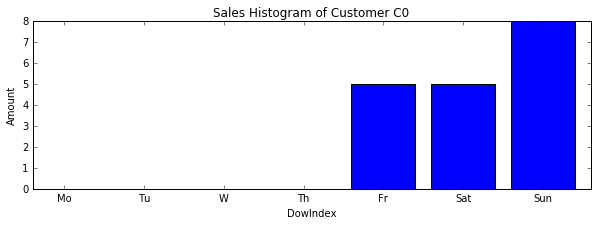

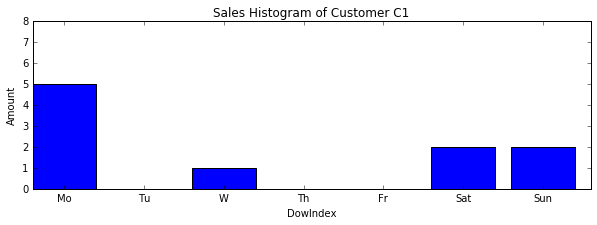

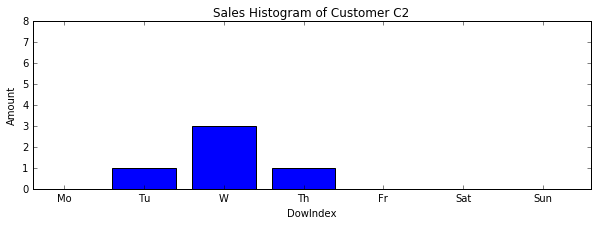

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


salesHistograms = np.zeros((3,7))
salesHistograms[0,4] = 5
salesHistograms[0,5] = 5
salesHistograms[0,6] = 8
salesHistograms[1,0] = 5
salesHistograms[1,2] = 1
salesHistograms[1,5] = 2
salesHistograms[1,6] = 2
salesHistograms[2,1] = 1
salesHistograms[2,2] = 3
salesHistograms[2,3] = 1

for i in range(salesHistograms.shape[0]):
    fig = plt.figure(num=None, figsize=(10,3), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(np.arange(salesHistograms.shape[1]), salesHistograms[i,:],  color='b', label='Real Sales')
    plt.axis([0, 7, 0, 8])
    plt.ylabel("Amount")
    plt.xlabel("DowIndex")
    plt.xticks(np.arange(7)+0.4, ['Mo','Tu','W','Th','Fr','Sat','Sun'])
    plotTitle = "Sales Histogram of Customer C%d" % i  
    plt.title(plotTitle)
    figureTitle = "../otherFiles/Section3_H_%d.png" % i 
    plt.savefig(figureTitle)